In [23]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


import numpy as np
import matplotlib
import matplotlib.pyplot as plt


x_train shape: (60000, 28, 28, 1)
Training sample size:  60000
Testing sample size:  10000


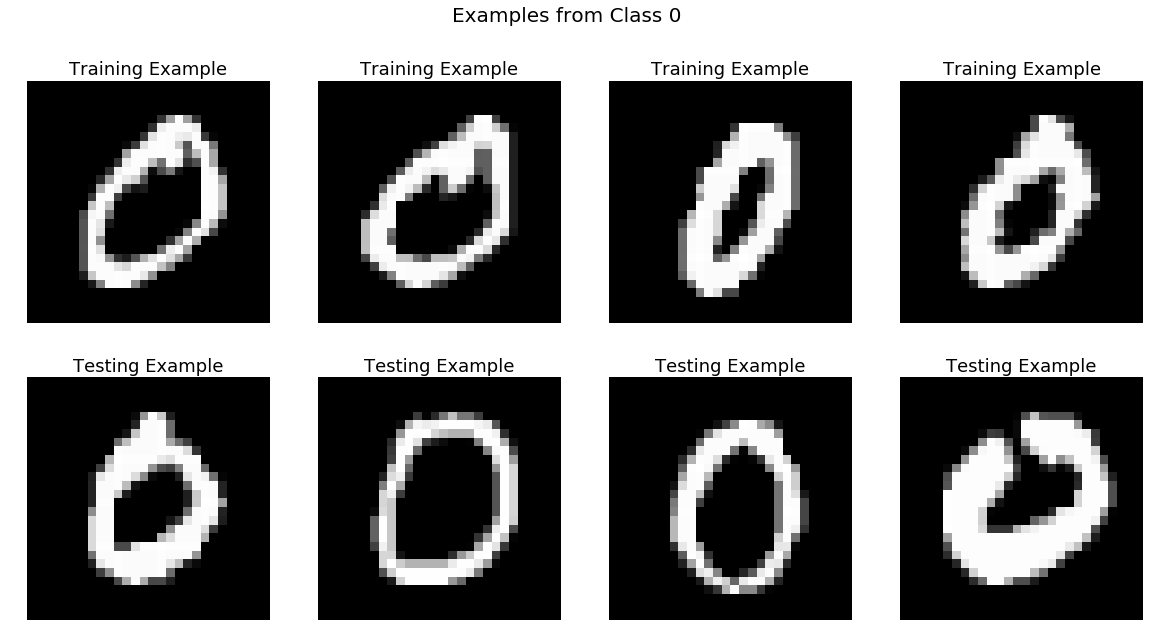

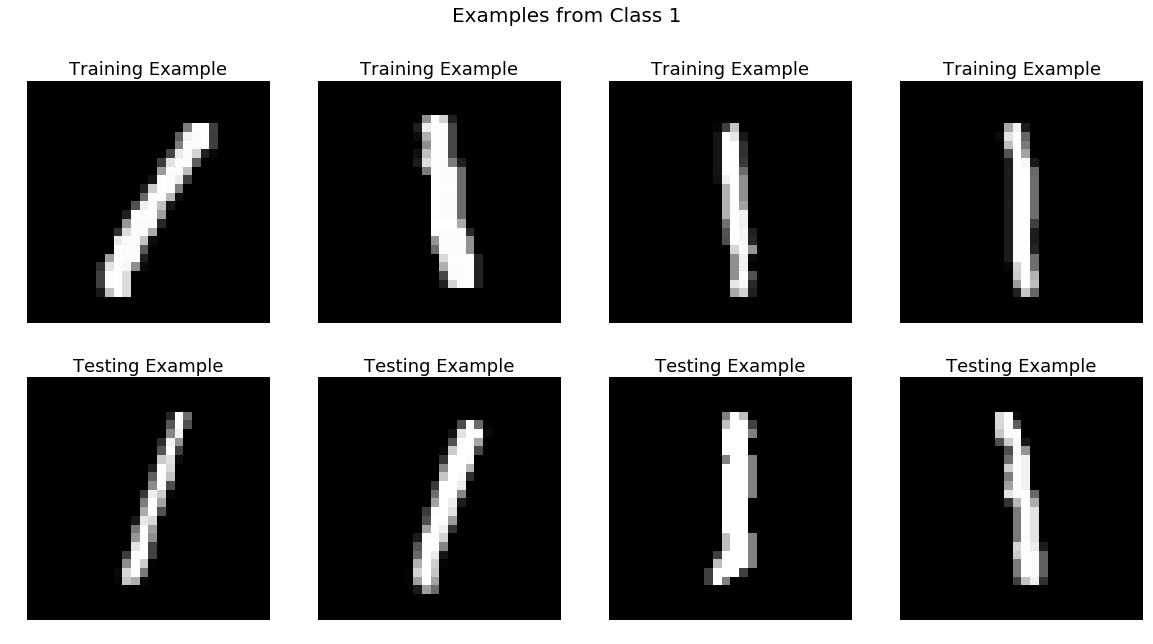

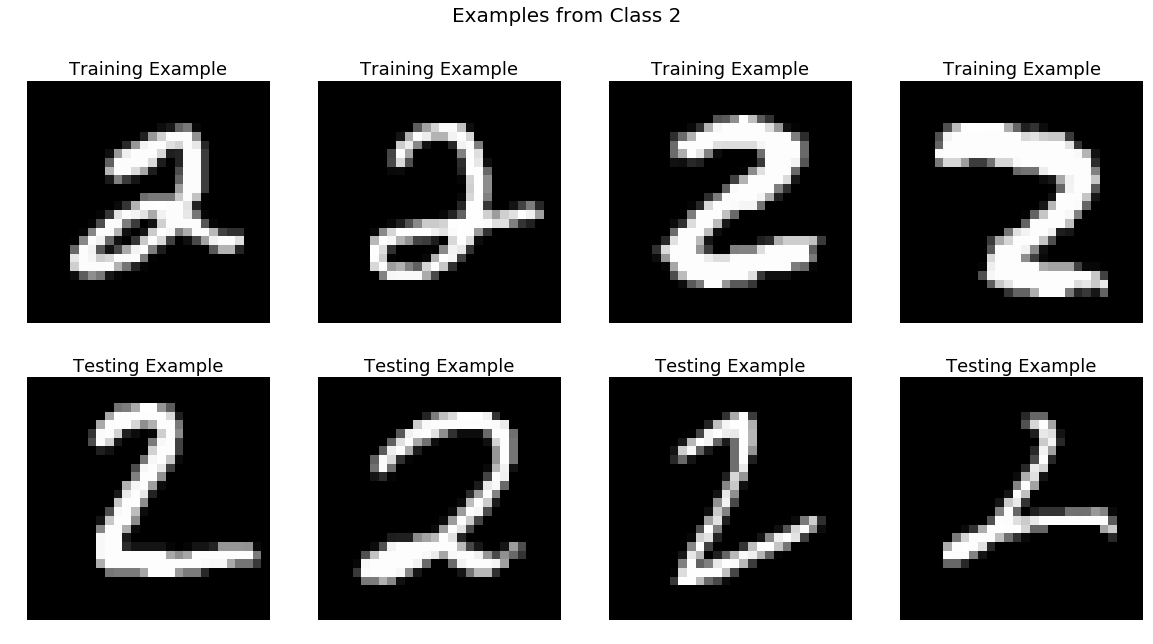

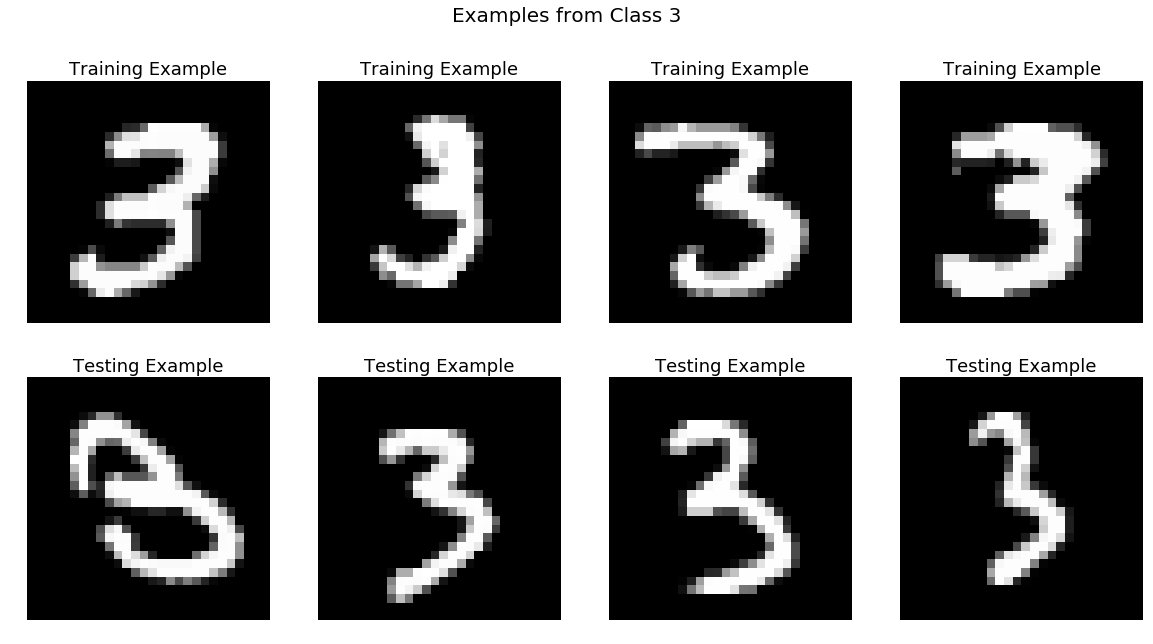

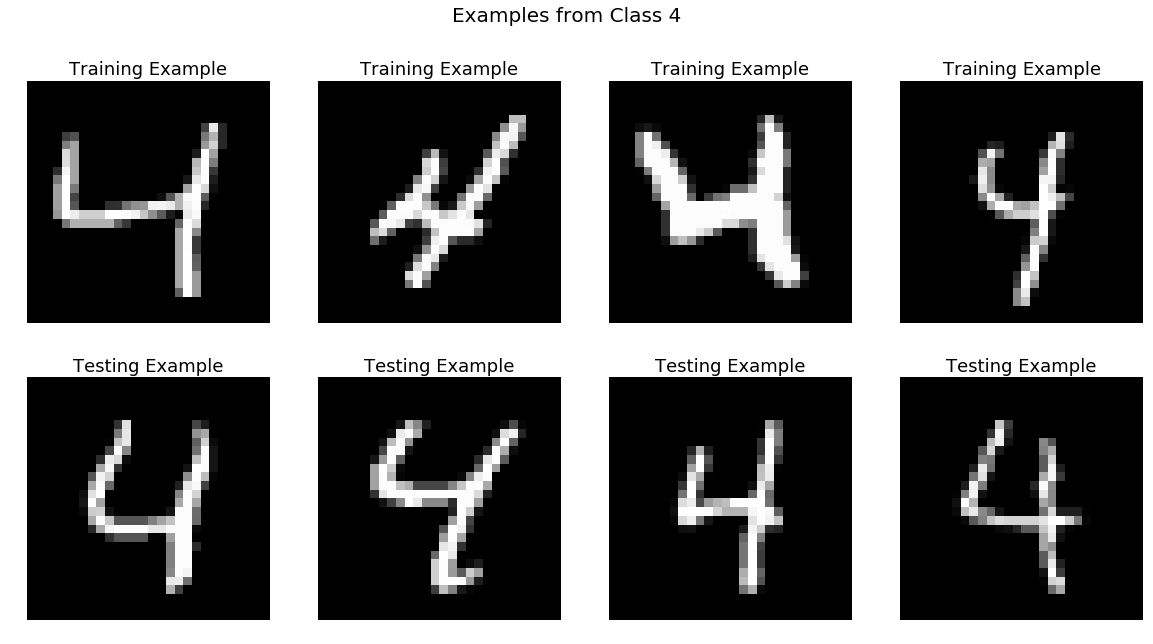

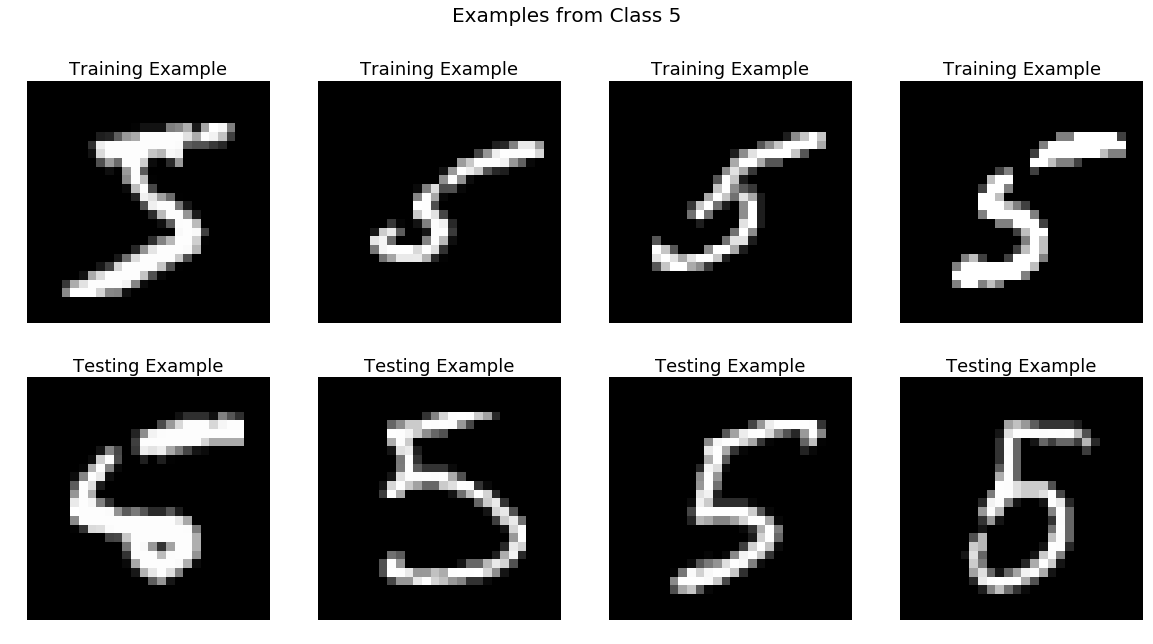

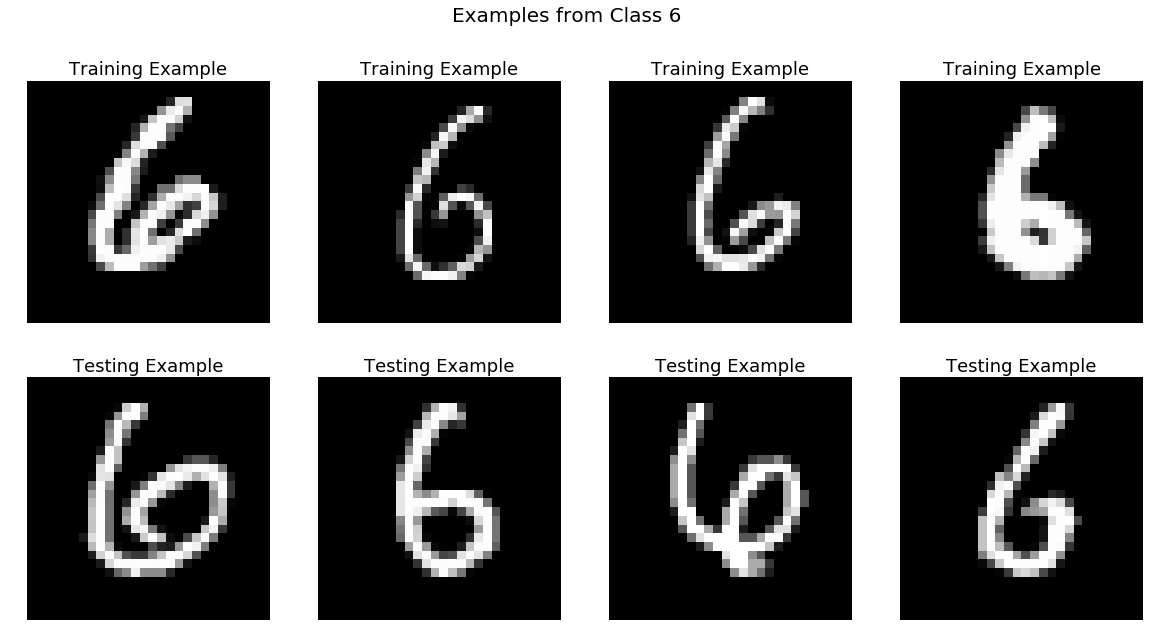

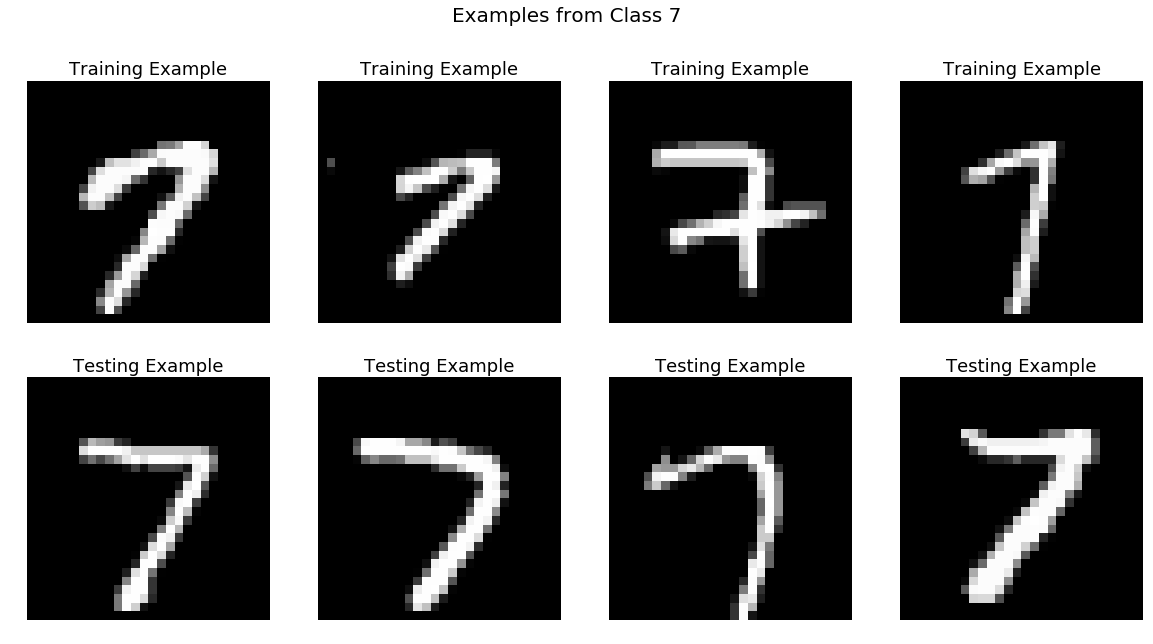

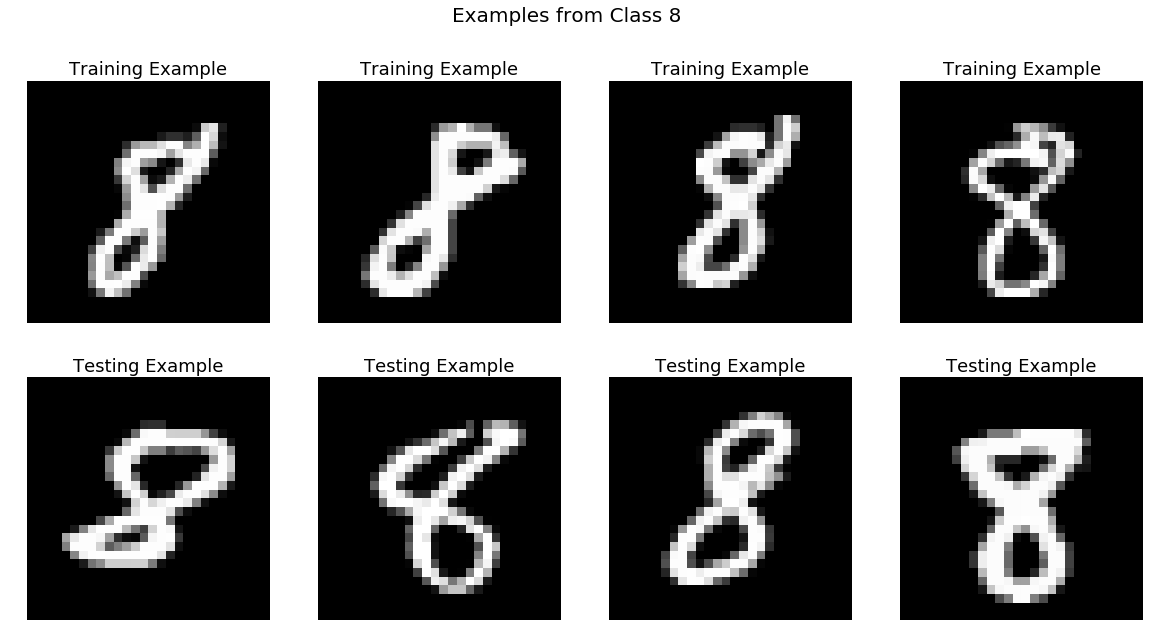

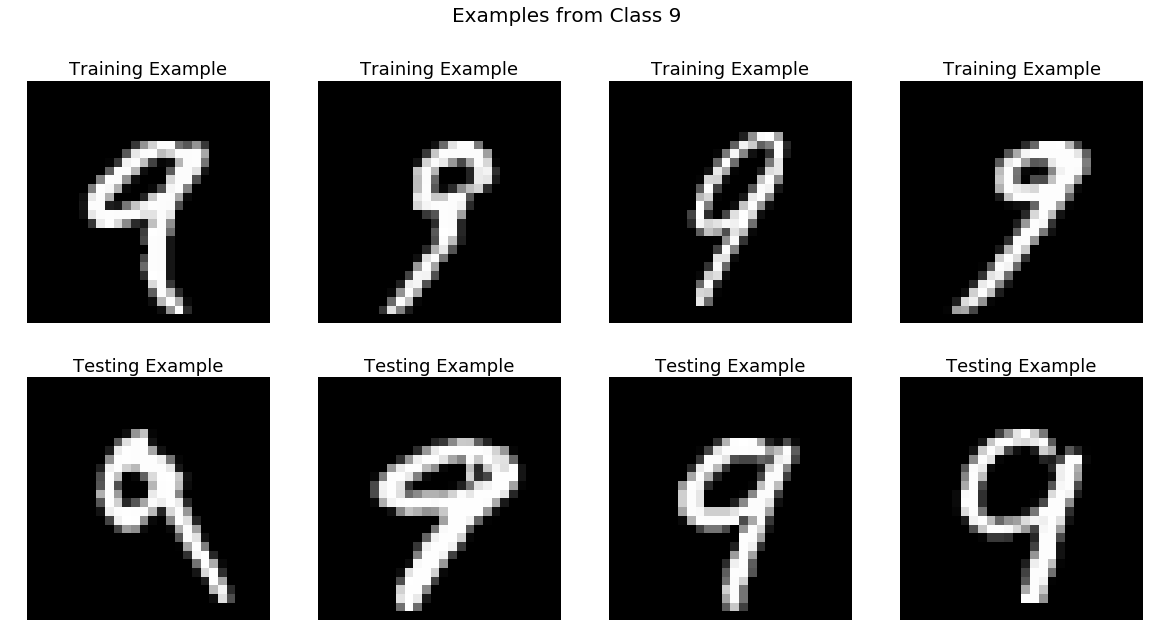

In [24]:
### Setup the training and test data sets.

num_classes, img_rows, img_cols = 10, 28, 28

# The data, shuffled and split between train and test sets:
(x_train, y_trainLabels), (x_test, y_testLabels) = mnist.load_data()

# Reshape the images, as necessary
if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
        print('channels_first')
else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)


# Convert class labels to binary (1-hot) 10-tuples.
y_train = keras.utils.to_categorical(y_trainLabels,  num_classes)
y_test  = keras.utils.to_categorical(y_testLabels,   num_classes)
y_trainLabels=y_trainLabels.flatten(); y_testLabels=y_testLabels.flatten();

print('x_train shape:', x_train.shape)
print('Training sample size: ', x_train.shape[0])
print('Testing sample size: ',  x_test.shape[0])
numOfRows = x_train.shape[1]; numOfCols = x_train.shape[2];
numOfCh = x_train.shape[3];

# Show a few example images from each class
for ii in range(num_classes):
    plt.figure(figsize=[20,10]); 
    plt.suptitle('Examples from Class '+str(ii), fontsize=20)
    indexTrainArray = np.where(y_trainLabels == ii)[0]
    indexTestArray  = np.where(y_testLabels == ii)[0]
    for jj in range(4):
        plt.subplot(2,4,jj+1); 
        anImage = x_train[indexTrainArray[jj],:,:,0]
        plt.imshow(anImage, cmap='gray'); plt.axis('off')
        plt.title('Training Example', fontsize=18)
        anImage = x_test[indexTestArray[jj],:,:,0]
        plt.subplot(2,4,jj+5); 
        plt.imshow(anImage, cmap='gray'); plt.axis('off')
        plt.title('Testing Example', fontsize=18)
    plt.show()


# Scale the pixel values in the images
x_train = x_train.astype('float32'); x_test = x_test.astype('float32')
x_train /= 255; x_test /= 255



In [25]:
batch_size = 32
epochs = 10

In [57]:
# Create a model object for a simple CNN without regularization
model = Sequential()









model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))
model.add(Dense(512, kernel_initializer='glorot_normal'))
model.add(Activation('tanh'))



#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.00008, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

cifarHistoryObj = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.5345 - acc: 0.8380 - val_loss: 0.3903 - val_acc: 0.8964
Epoch 2/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.3573 - acc: 0.9013 - val_loss: 0.2846 - val_acc: 0.9198
Epoch 3/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2843 - acc: 0.9232 - val_loss: 0.2267 - val_acc: 0.9407
Epoch 4/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2384 - acc: 0.9369 - val_loss: 0.2175 - val_acc: 0.9423
Epoch 5/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.2095 - acc: 0.9455 - val_loss: 0.2413 - val_acc: 0.9394
Epoch 6/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.1881 - acc: 0.9507 - val_loss: 0.1997 - val_acc: 0.9526
Epoch 7/10
 8320/60000 [===>..........................] - ETA: 2:44 - loss: 0.1834 - acc: 0.9531

KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
# Run network to generate predictions on a few images from the test set
numInPredSubset=15
predictionArray = model.predict(x_test[0:numInPredSubset, :,:,:])

# Find the output class with the peak value
predictedClassArray = np.argmax(predictionArray, axis=1).flatten()

In [ ]:
# Show images, their true class, and their preditions
for ii in range(numInPredSubset):
    plt.figure(figsize=[3,3]) 
    anImage = x_test[ii,:,:,0]; 
    plt.imshow(anImage, cmap='gray'); plt.axis('off')
    plt.title('Test image class: ' + str(y_testLabels[ii]) + '    Predicted class:' + \
              str(predictedClassArray[ii]), fontsize=16)


In [ ]:
# Score trained model against the training and test sets (i.e. generate predictions and calculate the accuracy)
trainScores = model.evaluate(x_train, y_train, verbose=1)
print('Training loss:', trainScores[0]); print('Training set accuracy:', trainScores[1])

testScores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', testScores[0]); print('Testing set accuracy:', testScores[1])

